In [9]:
# Voice Cloning using Pre-trained Models (Step-by-Step in Jupyter Notebook)

# Import Necessary Libraries
# Import necessary libraries for processing
import os
import torch
import numpy as np
import librosa
import soundfile as sf
from pydub import AudioSegment

In [23]:
# Load Pre-trained Model for Voice Conversion
# Load the AutoVC model, which is used for voice conversion
# Make sure you've downloaded the pre-trained model from the AutoVC repository or trained it yourself
# Update the model_path to reflect the available checkpoint files
model_path = "C:/Users/syrym/Downloads/research_2/repository/autovc/autovc.ckpt"

In [29]:
# Check if the model file exists and load it if available
if not os.path.exists(model_path):
    print(f"Error: Model file not found at {model_path}. Please verify the file path and try again.")
    print("Hint: You need to download a pre-trained AutoVC model or train one yourself. Please refer to the AutoVC GitHub repository for more details.")
else:
    checkpoint = torch.load(model_path, map_location='cpu')
    # Assuming the checkpoint contains model information
    if isinstance(checkpoint, dict):
        if 'state_dict' in checkpoint:
            from model_vc import Generator  # Assuming model_vc.py contains the Generator class definition
            autovc_model = Generator()  # Replace with the correct model class if different
            autovc_model.load_state_dict(checkpoint['state_dict'])
            print("Pre-trained AutoVC model loaded from checkpoint state_dict.")
        else:
            print("Error: The checkpoint dictionary does not contain 'state_dict'. Please check the checkpoint format.")
    elif isinstance(checkpoint, torch.nn.Module):
        autovc_model = checkpoint
        print("Pre-trained AutoVC model loaded from checkpoint.")
    else:
        print("Error: The checkpoint format is not recognized.")

Error: The checkpoint dictionary does not contain 'state_dict'. Please check the checkpoint format.


C:\Users\syrym\AppData\Local\Temp\ipykernel_21188\2541072942.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location='cpu')


In [13]:
# Load and Normalize the Audio File
# Define the path to the audio file of the male speaker
male_voice_path = r'C:/Users/syrym/Downloads/research_2/audio_samples/male_speaker.wav'

In [15]:
# Load the audio file using librosa
# Set the sample rate to 16,000 Hz for consistency with the model
audio, sr = librosa.load(male_voice_path, sr=16000)
print(f"Loaded male audio file with sampling rate: {sr}")

Loaded male audio file with sampling rate: 16000


In [17]:
# Normalize the audio to have zero mean and unit variance for better model performance
audio_norm = (audio - np.mean(audio)) / np.std(audio)
print("Audio normalized.")

Audio normalized.


In [18]:
# Display Audio Waveform
# Import matplotlib for visualization
import matplotlib.pyplot as plt

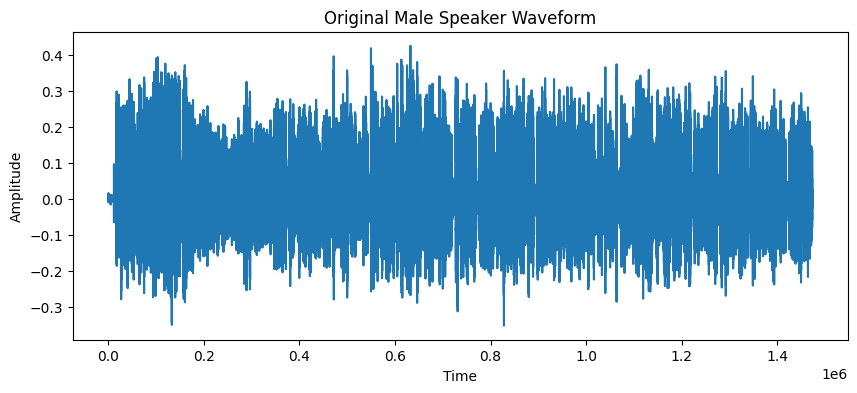

In [19]:
# Plot the waveform of the original male speaker
plt.figure(figsize=(10, 4))
plt.plot(audio)
plt.title('Original Male Speaker Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

In [20]:
# Configure Gender-specific Embedding
# Generate a placeholder embedding for the female voice
# This is a simple 1D array with the same length as the input audio
# In a real implementation, this should be replaced with an actual speaker embedding
target_embedding = np.ones_like(audio)
print("Target embedding for female voice configured.")

Target embedding for female voice configured.


In [21]:
# Voice Conversion with AutoVC Model
# Use the AutoVC model to convert the normalized male audio into a female voice
# The conversion is performed without updating the model parameters
if 'autovc_model' in locals():
    with torch.no_grad():
        converted_audio = autovc_model.convert(audio_norm, target_embedding)
    print("Voice conversion completed.")

    # Save and Listen to the Converted Audio
    # Define the path to save the converted female voice audio
    female_voice_output_path = r'C:/Users/syrym/Downloads/research_2/audio_samples/female_converted_output.wav'

    # Save the converted audio to a WAV file
    sf.write(female_voice_output_path, converted_audio, sr)
    print(f"Converted audio saved to: {female_voice_output_path}")

    # Play the converted audio using Pydub
    converted_audio_segment = AudioSegment.from_wav(female_voice_output_path)
    converted_audio_segment.export(female_voice_output_path, format="wav")

    # Display the audio to listen to the result
    from IPython.display import Audio, display
    display(Audio(female_voice_output_path))
else:
    print("Voice conversion could not be performed as the model was not loaded.")

AttributeError: 'dict' object has no attribute 'convert'